## Single point source with background

In this example we simulate a single point source placed at the center of the ROI with the addition of a background of a typical IXPE observation, and run a standard analysis to recover the polarization in two energy bins

In [1]:
import numpy
import ixpeobssim.core.pipeline as pipeline

from ixpeobssim.binning.polarization import xBinnedPolarizationCube
from ixpeobssim.binning.misc import xBinnedMap
from ixpeobssim.utils.units_ import arcmin_to_arcsec
from ixpeobssim.utils.environment import PYXSPEC_INSTALLED
if PYXSPEC_INSTALLED:
    import ixpeobssim.evt.xspec_ as xspec_

>>> Loading XSPEC local models from the "ixpeobssim" package in /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/xspec...
>>> Could not XSPEC load local models.

***Error: Xspec was unable to load the model package: ixpeobssim
   Either it could not find the model library file in the directory:
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/xspec
   or the file contains errors.
   (try "load (path)/(lib filename)" for more error info)
>>> (This might indicate that you need to compile them.)
>>> See the documentation for more info about XSPEC support.
>>> Done.


Configuration options for simulation and analysis

In [2]:
DURATION = 500000.
ENERGY_BINNING = numpy.array([2., 4., 8.])
MODEL_NAME = 'point_source_bkg'
CONFIG_FILE = '%s.py' % MODEL_NAME
SRC_RAD = 1.    #arcmin
BKG_INRAD = 2.  #arcmin
BKG_OUTRAD = 4. #arcmin

### Simulation

Load the model and run xpobssim to simulate the IXPE observation

In [5]:
pipeline.set_model(MODEL_NAME)
sim_list = pipeline.xpobssim(duration=DURATION, configfile=CONFIG_FILE)

>>> Setting output file base name to /Users/karur/ixpeobssimdata/point_source_bkg...
>>> Setting up the source model...
>>> Loading tabular data from /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/srcmodel/ascii/bkg_smcx1_01903701.txt...
>>> Done, 2 columns and 250 rows read out.
>>> ROI centered at (45.0000, 45.0000):
- xPointSource "Point source" (id = 0)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 1.111e-10 erg/cm2/s (5.55 mcrab)
    Position: RA = 45.0 deg, Dec = 45.0 deg
- xTemplateInstrumentalBkg "Instrumental background" (id = 1)
>>> Done [t0 + 0.015 s].
>>> Compiling the observation timeline...
>>> Running custom skyfield loader...
>>> Using builtin timescale ancillary data (from /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/instrument/data)...
>>> Loading SAA boundaries from /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/instrument/data/saa_polygon.txt...
>>> IXPE catalog #4


    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



### Count map visualization

Run xpbin with the CMAP algoritm to produce the count map and open it with xpbinview application

>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   419251R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   419251R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU 

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeob

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   409872R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   409872R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_cmap.fits...
>>> Setting xref to 45.0...
>>> Setting yref to 45.0...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_cmap.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   413504R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   413504R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_cmap.fits...
>>> Setting xref to 45.0...
>>> Setting yref to 45.0...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_cmap.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_cmap.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


Set MJD-OBS to 59690.000000 from DATE-OBS.
Set MJD-END to 59695.787037 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> xBinnedMap content:
{}
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin


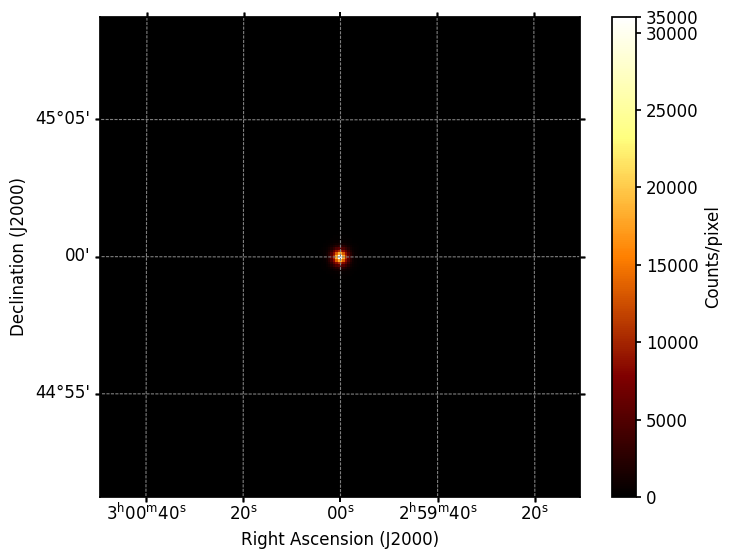

In [4]:
cmap_list = pipeline.xpbin(*sim_list, algorithm='CMAP')
pipeline.xpbinview(*cmap_list)

Instead of using xpbinview, we can open the binned files instancing the corresponding class and configure the plot as needed

>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


Set MJD-OBS to 59690.000000 from DATE-OBS.
Set MJD-END to 59695.787037 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


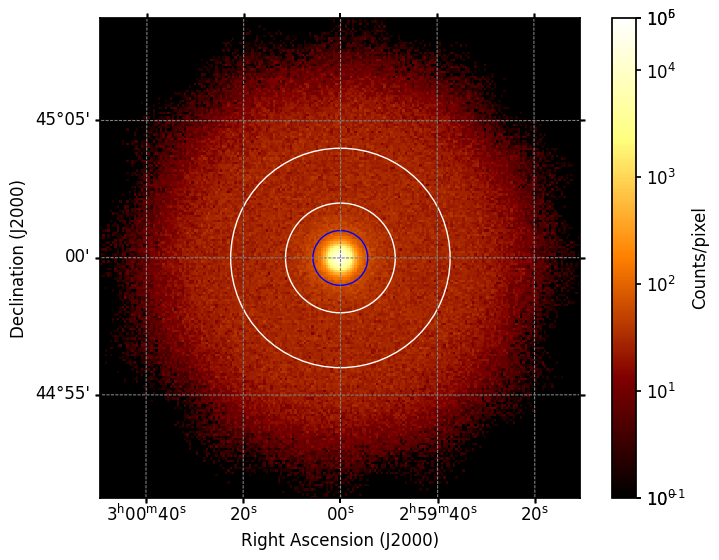

In [5]:
map_ = xBinnedMap.from_file_list(cmap_list)
map_.plot(stretch='log')
map_.fits_image.add_circle(45., 45., arcmin_to_arcsec(SRC_RAD), color='blue')
map_.fits_image.add_circle(45., 45., arcmin_to_arcsec(BKG_INRAD))
map_.fits_image.add_circle(45., 45., arcmin_to_arcsec(BKG_OUTRAD))

### Spatial selection

Select two spatial regions with xpselect: the source region and the background region

In [6]:
src_list = pipeline.xpselect(*sim_list, rad=SRC_RAD, suffix='src')
bkg_list = pipeline.xpselect(*sim_list, innerrad=BKG_INRAD, rad=BKG_OUTRAD, suffix='bkg')

>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   419251R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   419251R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU 

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeob

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   409872R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   409872R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...
>>> Setting ra to 45.0...
>>> Setting dec to 45.0...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   413504R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   413504R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...
>>> Setting ra to 45.0...
>>> Setting dec to 45.0...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits...
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   419251R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   419251R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU 

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg.fits...
>>> Setting ra to 45.0...
>>> Setting dec to 45.0...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   409872R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   409872R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg.fits...
>>> Setting ra to 45.0...
>>> Setting dec to 45.0...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   413504R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   413504R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg.fits...
>>> Setting ra to 45.0...
>>> Setting dec to 45.0...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3.fits...


### Polarization cubes

Run xpbin with the PCUBE algorithm to produce polarization cubes, which contain all the relevant polarimetric information binned in energy

In [7]:
kwargs = dict(algorithm='PCUBE', ebinalg='LIST', ebinning=ENERGY_BINNING)
src_pcubes_list = pipeline.xpbin(*src_list, **kwargs)
bkg_pcubes_list = pipeline.xpbin(*bkg_list, **kwargs)

>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   253494R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   253494R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTable

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pcube.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pcube.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   246589R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   246589R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pcube.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pcube.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   249460R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   249460R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pcube.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pcube.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   48624R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   48624R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHD

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg_pcube.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg_pcube.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   47827R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   47827R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg_pcube.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg_pcube.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   47747R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   47747R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg_pcube.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg_pcube.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg.fits...


### Background subtraction

Open the polarization cubes for both the source and background regions, rescale the background for the area and subtract its content from the source

>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   2R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   2R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   2R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   2R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   2R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_bkg_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   2R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


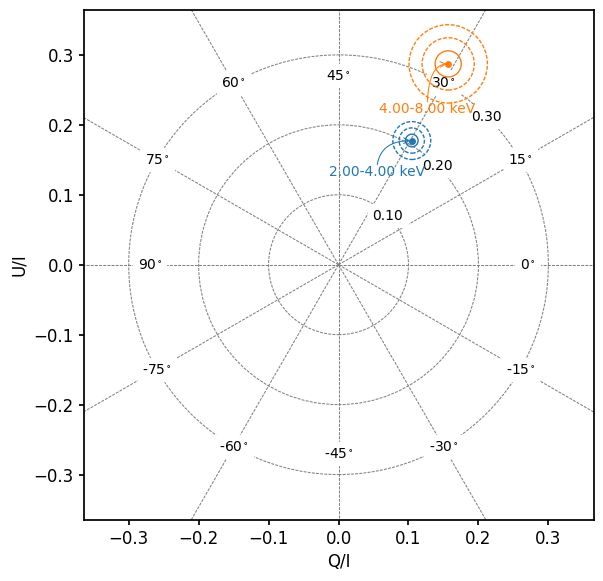

In [8]:
pcube_src = xBinnedPolarizationCube.from_file_list(src_pcubes_list)
pcube_bkg = xBinnedPolarizationCube.from_file_list(bkg_pcubes_list)
beta = pcube_src.backscal() / pcube_bkg.backscal()
pcube_bkg *= beta
pcube_src -= pcube_bkg
pcube_src.plot()

### Stokes spectra

Run xpbin with PHA1, PHA1Q and PHA1U algorithms to bin the data and produce a complete set of Stokes spectra

In [9]:
for algorithm in ['PHA1', 'PHA1Q', 'PHA1U']:
    pipeline.xpbin(*src_list, algorithm=algorithm)

>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   253494R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   253494R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTable

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   246589R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   246589R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   249460R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   249460R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   253494R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   253494R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTable

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1q.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1q.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   246589R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   246589R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1q.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1q.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   249460R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   249460R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1q.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1q.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   253494R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   253494R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTable

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1u.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1u.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   246589R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   246589R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1u.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du1_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1u.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...


Filename: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   249460R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   249460R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   2R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   100002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 45.0  45.0  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1u.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du2_src.fits...
>>> Output file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1u.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file /Users/karur/ixpeobssimdata/point_source_bkg_du3_src.fits...


If pyxspec is correctly installed and available to use, run xpxspec to perform a spectro-polarimetric fit of the Stokes spectra with a powerlaw as spectral model and a linear model for the polarization

>>> Loading input files...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du1_src_pha1.fits (PHA1, DU 1) at data group 1
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1.fits...



1 spectrum  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.074e-01 +/- 1.008e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.995e+05 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d1_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du2_src_pha1.fits (PHA1, DU 2) at data group 2
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1.fits...



2 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  4.936e-01 +/- 9.940e-04
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.996e+05 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d2_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d2_obssim_v012.arf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du3_src_pha1.fits (PHA1, DU 3) at data group 3
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1q.fits...



3 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1.fits  Spectrum 3
Net count rate (cts/s) for Spectrum:3  4.994e-01 +/- 9.998e-04
 Assigned to Data Group 1 and Plot Group 3
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.996e+05 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d3_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d3_obssim_v012.arf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du1_src_pha1q.fits (PHA1Q, DU 1) at data group 4
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1q.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1q.fits...



4 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1q.fits  Spectrum 4
Net count rate (cts/s) for Spectrum:4  1.071e-02 +/- 1.424e-03
 Assigned to Data Group 1 and Plot Group 4
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.995e+05 sec
  Filtering Keys: 
    Stokes: 1
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d1_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d1_obssim_v012.mrf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du2_src_pha1q.fits (PHA1Q, DU 2) at data group 5
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1q.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1q.fits...



5 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1q.fits  Spectrum 5
Net count rate (cts/s) for Spectrum:5  1.057e-02 +/- 1.407e-03
 Assigned to Data Group 1 and Plot Group 5
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.996e+05 sec
  Filtering Keys: 
    Stokes: 1
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d2_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d2_obssim_v012.mrf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du3_src_pha1q.fits (PHA1Q, DU 3) at data group 6
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1q.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1u.fits...



6 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1q.fits  Spectrum 6
Net count rate (cts/s) for Spectrum:6  9.815e-03 +/- 1.414e-03
 Assigned to Data Group 1 and Plot Group 6
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.996e+05 sec
  Filtering Keys: 
    Stokes: 1
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d3_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d3_obssim_v012.mrf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du1_src_pha1u.fits (PHA1U, DU 1) at data group 7
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1u.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1u.fits...



7 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du1_src_pha1u.fits  Spectrum 7
Net count rate (cts/s) for Spectrum:7  1.763e-02 +/- 1.426e-03
 Assigned to Data Group 1 and Plot Group 7
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.995e+05 sec
  Filtering Keys: 
    Stokes: 2
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d1_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d1_obssim_v012.mrf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du2_src_pha1u.fits (PHA1U, DU 2) at data group 8
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1u.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1u.fits...



8 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du2_src_pha1u.fits  Spectrum 8
Net count rate (cts/s) for Spectrum:8  1.665e-02 +/- 1.404e-03
 Assigned to Data Group 1 and Plot Group 8
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.996e+05 sec
  Filtering Keys: 
    Stokes: 2
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d2_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d2_obssim_v012.mrf

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  SPECTRUM      1 BinTableHDU     55   375R x 3C   ['J', 'E', 'E']   


>>> Registering [...]point_source_bkg_du3_src_pha1u.fits (PHA1U, DU 3) at data group 9
>>> Loading binned count spectrum from /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1u.fits...



9 spectra  in use
 
Spectral Data File: /Users/karur/ixpeobssimdata/point_source_bkg_du3_src_pha1u.fits  Spectrum 9
Net count rate (cts/s) for Spectrum:9  1.857e-02 +/- 1.414e-03
 Assigned to Data Group 1 and Plot Group 9
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 4.996e+05 sec
  Filtering Keys: 
    Stokes: 2
 Using fit statistic: chi
 Using Response (RMF) File            /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d3_obssim_v012.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/mrf/ixpe_d3_obssim_v012.mrf



>>> Done, 9 file(s) loaded.
>>> Ignoring channels below 2.000 keV...
>>> Ignoring channels above 8.000 keV...
>>> Setting up model "powerlaw*pollin"...
>>> Setting parameter 6 to 0.000000...
>>> Fit model: powerlaw*pollin (chi = 1344.04 / 1336)
       PhoIndex: 1.982e+00 +/- 5.775e-03 (+5.792e-03 / -5.773e-03) FFFFFFFFF
           norm: 4.676e-02 +/- 2.852e-04 (+2.874e-04 / -2.846e-04) FFFFFFFFF
             A1: 1.385e-01 +/- 1.934e-02 (+1.934e-02 / -1.934e-02) FFFFFFFFF
         Aslope: 4.109e-02 +/- 7.095e-03 (+7.100e-03 / -7.095e-03) FFFFFFFFF
           psi1: 2.962e+01 +/- 9.102e-01 (+9.109e-01 / -9.112e-01) FFFFFFFFF
       psislope: 0.000e+00     (frozen)



    50 channels (1-50) ignored in spectrum #     1
    50 channels (1-50) ignored in spectrum #     2
    50 channels (1-50) ignored in spectrum #     3
    50 channels (1-50) ignored in spectrum #     4
    50 channels (1-50) ignored in spectrum #     5
    50 channels (1-50) ignored in spectrum #     6
    50 channels (1-50) ignored in spectrum #     7
    50 channels (1-50) ignored in spectrum #     8
    50 channels (1-50) ignored in spectrum #     9

   176 channels (200-375) ignored in spectrum #     1
   176 channels (200-375) ignored in spectrum #     2
   176 channels (200-375) ignored in spectrum #     3
   176 channels (200-375) ignored in spectrum #     4
   176 channels (200-375) ignored in spectrum #     5
   176 channels (200-375) ignored in spectrum #     6
   176 channels (200-375) ignored in spectrum #     7
   176 channels (200-375) ignored in spectrum #     8
   176 channels (200-375) ignored in spectrum #     9


Model powerlaw<1>*pollin<2> Source No.: 1   Active/O

>>> Done, 149 point(s) found, model available


18557e+08     using 149 bins, spectrum 2.
                 Chi-Squared              5.690538e+08     using 149 bins, spectrum 3.
                 Chi-Squared                  234.97     using 149 bins, spectrum 4.
                 Chi-Squared                  212.25     using 149 bins, spectrum 5.
                 Chi-Squared                  243.40     using 149 bins, spectrum 6.
                 Chi-Squared              3.241144e+07     using 149 bins, spectrum 7.
                 Chi-Squared              3.152961e+07     using 149 bins, spectrum 8.
                 Chi-Squared              3.232736e+07     using 149 bins, spectrum 9.
Total fit statistic                       1.792386e+09     with 1336 d.o.f.

Test statistic : Chi-Squared              1.792386e+09     using 1341 bins.
 Null hypothesis probability of 0.000000e+00 with 1336 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly lo

>>> Done, 149 point(s) found, model available


    1   powerlaw   PhoIndex            1.98202      +/-  5.77527E-03  
   2    1   powerlaw   norm                4.67636E-02  +/-  2.85226E-04  
   3    2   pollin     A1                  0.138459     +/-  1.93383E-02  
   4    2   pollin     Aslope              4.10891E-02  +/-  7.09539E-03  
   5    2   pollin     psi1       deg      29.6243      +/-  0.910237     
   6    2   pollin     psislope            0.0          frozen
________________________________________________________________________


Fit statistic  : Chi-Squared                  156.94     using 149 bins, spectrum 1.
                 Chi-Squared                  140.77     using 149 bins, spectrum 2.
                 Chi-Squared                  174.20     using 149 bins, spectrum 3.
                 Chi-Squared                  149.01     using 149 bins, spectrum 4.
                 Chi-Squared                  130.88     using 149 bins, spectrum 5.
                 Chi-Squared                  151.36     using 149

>>> Done, 149 point(s) found, model available
>>> Done, 149 point(s) found, model available


um 1.
                 Chi-Squared                  140.77     using 149 bins, spectrum 2.
                 Chi-Squared                  174.20     using 149 bins, spectrum 3.
                 Chi-Squared                  149.01     using 149 bins, spectrum 4.
                 Chi-Squared                  130.88     using 149 bins, spectrum 5.
                 Chi-Squared                  151.36     using 149 bins, spectrum 6.
                 Chi-Squared                  146.78     using 149 bins, spectrum 7.
                 Chi-Squared                  158.87     using 149 bins, spectrum 8.
                 Chi-Squared                  135.22     using 149 bins, spectrum 9.
Total fit statistic                          1344.04     with 1336 d.o.f.

Test statistic : Chi-Squared                 1344.04     using 1341 bins.
 Null hypothesis probability of 4.33e-01 with 1336 degrees of freedom


>>> Done, 149 point(s) found, model available
>>> Done, 149 point(s) found, model available
>>> Done, 149 point(s) found, model available
>>> Done, 149 point(s) found, model available
>>> Done, 149 point(s) found, model available


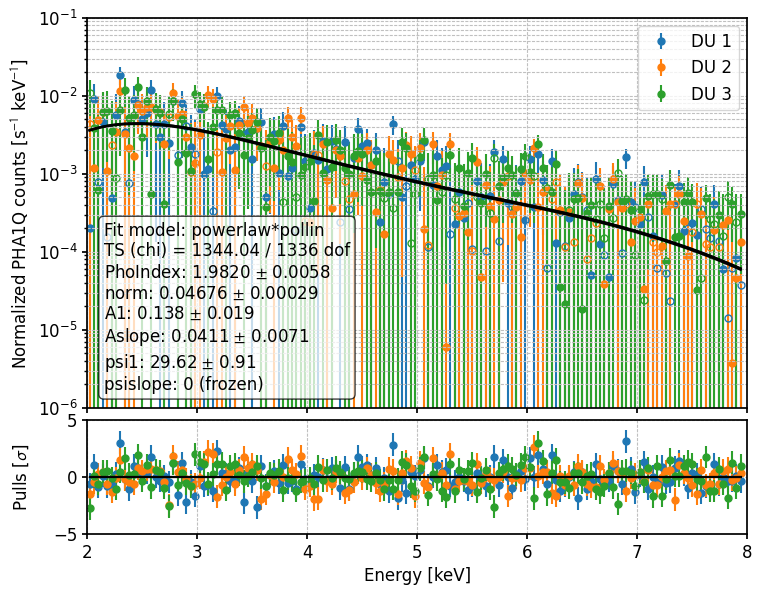

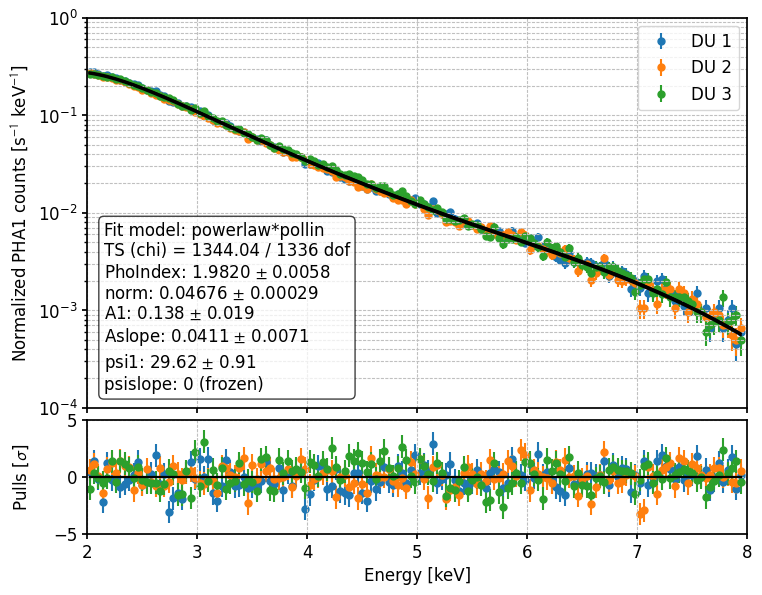

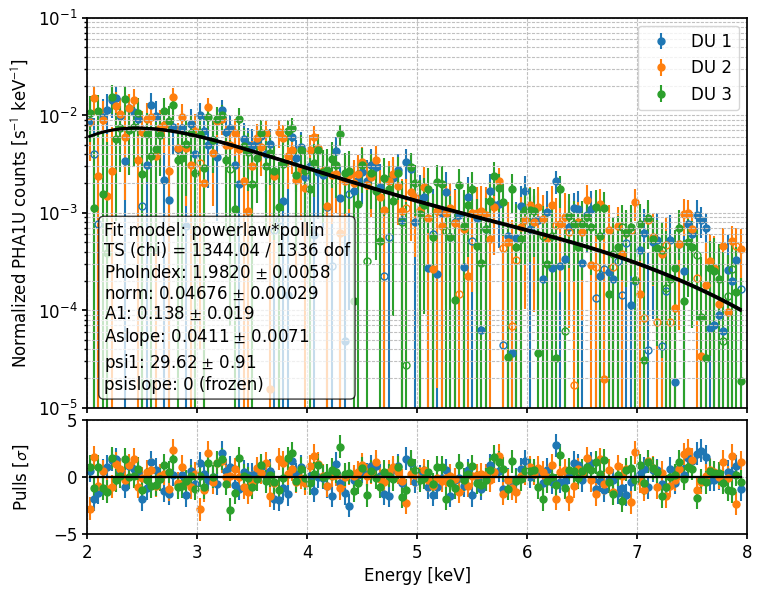

In [12]:
if PYXSPEC_INSTALLED:
    pha_list = pipeline.file_list('src', 'pha1*')
    fit_output = pipeline.xpxspec(*pha_list, model='powerlaw*pollin', plot=True, fixpars='6,0.')